<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> SLR <br>(Advanced)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### Life Expectancy data

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Load the Life expectancy dataset and display the first five records 

In [2]:
# load the csv file
df_lifeExp = pd.read_csv('Life_Expectancy.csv')

# display the first five observations
df_lifeExp.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,Angola,Antigua
Year,2015,2015,2015,2015,2015
Status,Developing,Developing,Developing,Developing,Developing
Adult_Mortality,263.0,74.0,19.0,335.0,13.0
Infant_Deaths,62,0,21,66,0
Alcohol,0.01,4.6,NaN,NaN,NaN
Hepatitis B,65.0,99.0,95.0,64.0,99.0
Measles,1154,0,63,118,0
BMI,19.1,58.0,59.5,23.3,47.7
Underfive_Deaths,83,0,24,98,0


#### Check the shape of the data and display its information

In [ ]:
# check the size of the dataframe
df_lifeExp.shape

In [ ]:
df_lifeExp.dtypes

In [3]:
# use 'info()' to understand the dataset
df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

<a id="eda"> </a>
## Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# find total number of missing values in column 'Life_Expectancy'
df_lifeExp.Life_Expectancy.isnull().sum()

9

In [5]:
# isnull() returns the boolean output, returns True for record where null value is present
na_data = df_lifeExp.Life_Expectancy.isnull() 

# obtain a list of all records where indicating value is true 
na_data.index[na_data == True].tolist()

[46, 100, 104, 111, 118, 122, 135, 138, 168]

In [6]:
# drop all the records for which target variable information is missing by index
df_lifeExp = df_lifeExp.drop(df_lifeExp.index[[46, 100, 104, 111, 118, 122, 135, 138, 168]])

# find total number of missing values in column 'Life_Expectancy'
df_lifeExp.Life_Expectancy.isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# check the size of the dataframe
df_lifeExp.shape


(173, 20)

In [8]:
# display the total number of null values in each column of dataframe

# 'ascending = False' sorts values in the descending order
Total = df_lifeExp.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df_lifeExp.isnull().sum()*100/df_lifeExp.isnull().count()).sort_values(ascending=False)  

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
Alcohol,166,95.953757
Population,34,19.653179
GDP,21,12.138728
Hepatitis B,9,5.202312
Schooling,7,4.046243
Income_Index,7,4.046243
Malnourished5_9,2,1.156069
Malnourished10_19,2,1.156069
BMI,2,1.156069
Country,0,0.000000


In [9]:
# drop the variable 'Alcohol' from the dataframe
df_lifeExp = df_lifeExp.drop("Alcohol",axis=1)

We impute the other missing values in the data.

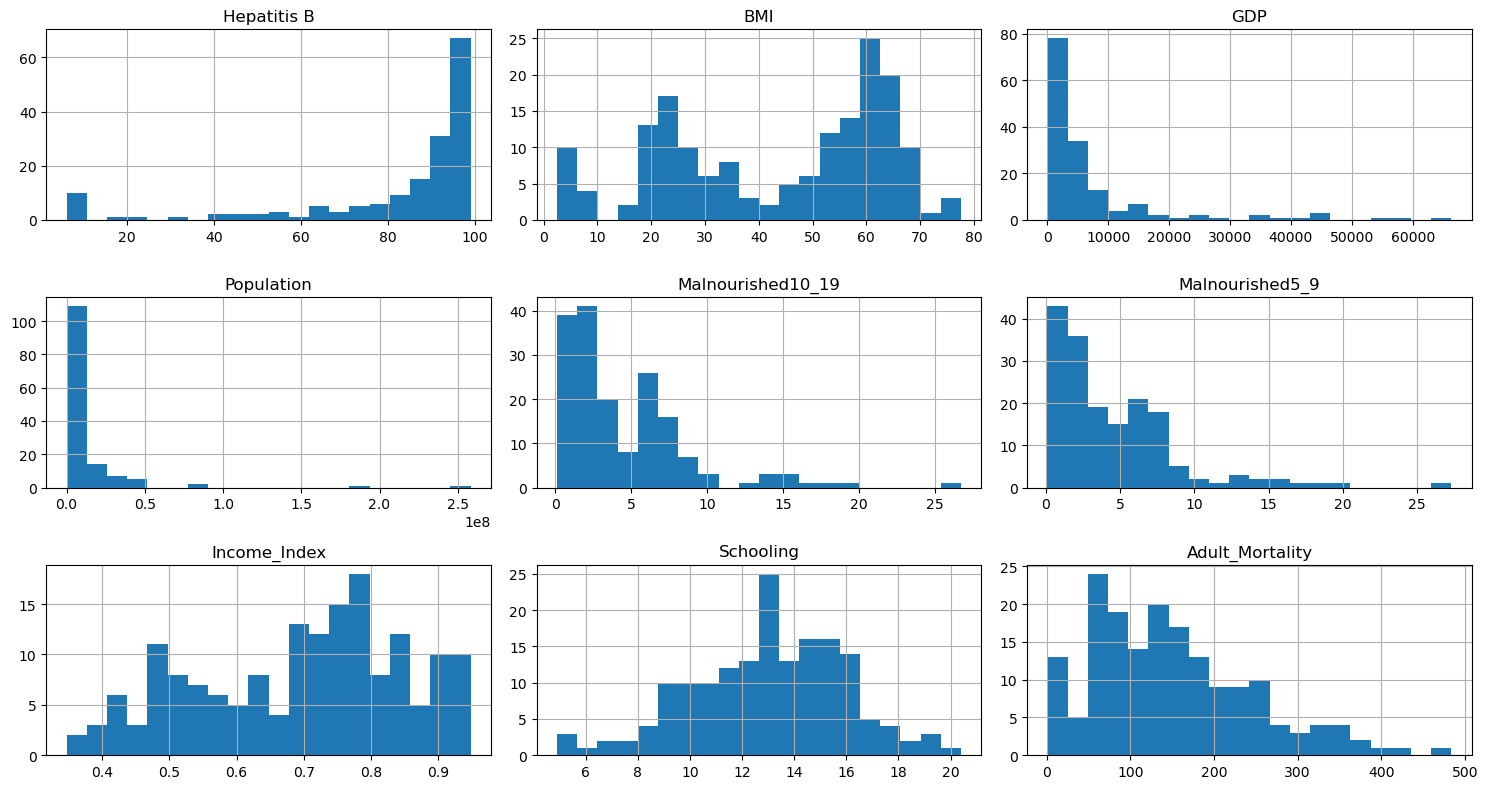

In [10]:
# extract all the variables with missing values in a new dataframe 'df_missing_values'
df_missing_values = df_lifeExp[['Hepatitis B','BMI','GDP','Population','Malnourished10_19',
                                'Malnourished5_9','Income_Index','Schooling','Adult_Mortality']]

# plot histogram of all variables which have missing values
# set the number of bins to 20
# set the figure size using 'figsize'
df_missing_values.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [11]:
# impute skewed variables with median

# impute for variable 'GDP'
df_lifeExp['GDP'] = df_lifeExp['GDP'].fillna(df_lifeExp['GDP'].median())

# impute for variable 'Hepatitis B'
df_lifeExp['Hepatitis B'] = df_lifeExp['Hepatitis B'].fillna(df_lifeExp['Hepatitis B'].median())


# impute for variable 'Malnourished10_19'
df_lifeExp['Malnourished10_19'] = df_lifeExp['Malnourished10_19'].fillna(df_lifeExp['Malnourished10_19'].median())


# impute for variable 'Malnourished5_9'
df_lifeExp['Malnourished5_9'] = df_lifeExp['Malnourished5_9'].fillna(df_lifeExp['Malnourished5_9'].median())


# impute for variable 'Population'
df_lifeExp['Population'] = df_lifeExp['Population'].fillna(df_lifeExp['Population'].median())

In [12]:
# impute remaining variables with mean 

# impute for variable 'BMI'
df_lifeExp['BMI'] = df_lifeExp['BMI'].fillna(df_lifeExp['BMI'].mean())

# impute for variable 'Income_Index'
df_lifeExp['Income_Index'] = df_lifeExp['Income_Index'].fillna(df_lifeExp['Income_Index'].mean())

# impute for variable 'Schooling' 
df_lifeExp['Schooling'] = df_lifeExp['Schooling'].fillna(df_lifeExp['Schooling'].mean())

# impute for variable 'Adult_Mortality' 
df_lifeExp['Adult_Mortality'] = df_lifeExp['Adult_Mortality'].fillna(df_lifeExp['Adult_Mortality'].mean())

In [13]:
# display the total number of null values in each variable of the dataframe
df_lifeExp.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# check the size of the dataframe
df_lifeExp.shape

In [ ]:
df_lifeExp.describe()

In [ ]:
# describe categorical features from dataframe
# include : chooses columns of specified dtype
df_lifeExp.describe(include = ['object'])

In [14]:
# drop the variable 'Country' from the dataframe
df_lifeExp = df_lifeExp.drop("Country",axis = 1)

In [ ]:
# describe numerical features from dataframe
# include : chooses variable of specified dtype
df_lifeExp.describe(include = ['int64','float64'])

In [ ]:
# display count of unique values in the column
df_lifeExp.Year.value_counts()

In [15]:
# drop the variable 'Year' from the dataframe
df_lifeExp = df_lifeExp.drop("Year",axis=1) 

In [16]:
# drop the variable 'Infant_Deaths' from the dataframe
df_lifeExp = df_lifeExp.drop("Income_Index",axis=1)

In [17]:
# check the size of the dataframe
df_lifeExp.shape

(173, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# describe categorical features from dataframe
# include : chooses columns of specified dtype
df_lifeExp.describe(include=['object'])

In [18]:
# use 'drop_first' to create (n-1) dummy variables
# use 'prefix' to add prefix to dummy variable
df_lifeExp['Status'] = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True)

In [19]:
# display head of the data
df_lifeExp.head(5)

,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Schooling,Life_Expectancy
0,1,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,10.1,65.0
1,1,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,14.2,77.8
2,1,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,14.4,75.6
3,1,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,11.4,52.4
4,1,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,13.9,76.4


<a id="lf"> </a>
## Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# select the independent variables
X = df_lifeExp.iloc[:,:15]

# to estimate the regression coefficient , a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# build a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

In [21]:
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     49.94
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           1.02e-44
Time:                        15:36:41   Log-Likelihood:                -348.04
No. Observations:                 138   AIC:                             728.1
Df Residuals:                     122   BIC:                             774.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                61.1776      2.82

In [22]:
# Level of Errors for full model (using OLS Estiamtion)
# predict the values of target variable using train data
y_pred_train = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print ("MSE for Train Data:",mse_train)
y_pred_test=MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)

MSE for Train Data: 9.080343549996025
MSE for Test Data: 10.940507132467278


In [ ]:
# compute the fitted values
y_pred = MLR_model.fittedvalues

# compute the fitted values and residuals
res = MLR_model.resid

# set the figure size 
plt.figure(figsize=(10,7))

# plot a scatter plot for predicted values and residuals
plt.scatter(x = y_pred, y = res)

# add plot title
# set text size using 'fontsize'
plt.title('Scatter plot for fitted values and residuals', fontsize = 15)

# add axis label
# set text size using 'fontsize'
plt.xlabel('Fitted Values', fontsize = 15)

# add axis label
# set text size using 'fontsize'
plt.ylabel('Residuals', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# select the variables describing immunization : Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[2,6,7]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X, y)

# predict the values of target variable using train data
y_pred = MLR_model.predict(X)

# capture all the residuals of the model in a numpy array
residuals = np.array(y - y_pred)

# calculate unexplained_variation 
unexplained_variation = np.sum(residuals**2)

print("The unexplained variation for the model is",unexplained_variation)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,[11,12]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset 
# set 'random_state' to generate the same dataset each time you run the code  
# 'test_size' returns the proportion of data to be included in the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

# fit a model with an intercept using fit() 
# add_constant(): adds the intercept term to the model 
MLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  

# print the summary output 
print(MLR_model.summary())

<a id="gd"> </a>
## Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# select the variable describing adult mortality rate
# reshape(): used to change the dimension of input since SGDRegressor expects atleast a 2-D numpy array
X = df_lifeExp.iloc[:,1].values
X = X.reshape(-1,1)

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

The model using least sqaures method:

In [ ]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# predict the values of target variable using entire data
lin_pred = MLR_model.predict(X_train)

The model using stochastic gradient descent:

In [ ]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# predict the values of target variable using entire data
sgd_pred = linreg_with_SGD.predict(X_train)

We visualize both the fits:

In [ ]:
# set the figure size 
plt.figure(figsize=(10,7))

# plot the scatter plot
# colors: set the color of the points in the scatter plot
plt.scatter(X_train, y_train,color='grey')

# set xlabel for the plot
plt.xlabel("Adult Mortality Rate",fontsize = 15)

# set ylabel for the plot
plt.ylabel("Life Expectancy",fontsize = 15)

# set title for the plot
plt.title("Comparison of fits",fontsize = 15)

# plot the regression line for the two models
# color: set the color of the line
# label: set the label of the line for the legend
plt.plot(X_train,sgd_pred,color='red',label='SGD regressor')
plt.plot(X_train,lin_pred,color='blue',label='Least squares regressor')

# set the position of legend
plt.legend(loc='upper left')

# disply the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting the variables describing immunization : Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[2,6,7]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [ ]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

In [ ]:
# create a dataframe of variables descibing immunization
df_immunization=df_lifeExp.iloc[:,[2,6,7]]

# create a dataframe containing the beta coefficients for the linear regression models build using sklearn and SGD 
# 'coef_' returns the value of each coefficient
# pass the required column names to the parameter, 'columns'
# pass the row indexes to the parameter, 'index'
df_coeff = pd.DataFrame([MLR_model.coef_, linreg_with_SGD.coef_], columns = df_immunization.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])

# plot a side by side bar graph
# 'T' returns the transposed dataframe 
# set figure size using 'figsize'
fig = df_coeff.T.plot.barh( figsize=(10,7))

# set axes and plot labels
# set the text size using 'fontsize'
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)

# set the x-axis labels horizontally
plt.xticks(rotation = 'horizontal')

# set the position of legend
fig.legend(loc='upper left')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecting the independent variables
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [ ]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

In [ ]:
# obtain the R-squared
r_square = MLR_model.score(X_train, y_train)

# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))

# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

In [ ]:
# Full model using Full batch Gradient Descent:

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001,
                        learning_rate='optimal', random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)
# Make predictions on your train data
y_pred_train = linreg_with_SGD.predict(X_train)
# Make predictions on your test data
y_pred_test = linreg_with_SGD.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print ("MSE for Train Data:",mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)

In [ ]:
# Full model using Mini-Batch Gradient Descent:

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd_minibatch = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001,
                        learning_rate='optimal', random_state = 1)
# Parameters
batch_size = 20
n_batches = X_train.shape[0] // batch_size

# Mini-batch gradient descent loop
for epoch in range(100):  # number of epochs
    for i in range(n_batches):
        # Create mini-batch
        start_index = i * batch_size
        end_index = start_index + batch_size
        X_batch = X_train[start_index:end_index]
        y_batch = y_train[start_index:end_index]

        # Update the model using the mini-batch
        sgd_minibatch.partial_fit(X_batch, y_batch)

# Make predictions on your test data
y_pred_test = sgd_minibatch.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)


In [ ]:
# Full model using Stochastic Gradient Descent:

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd_minibatch = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001,
                        learning_rate='optimal', random_state = 1)
# Parameters
batch_size = 1
n_batches = X_train.shape[0] // batch_size

# Mini-batch gradient descent loop
for epoch in range(100):  # number of epochs
    for i in range(n_batches):
        # Create mini-batch
        start_index = i * batch_size
        end_index = start_index + batch_size
        X_batch = X_train[start_index:end_index]
        y_batch = y_train[start_index:end_index]

        # Update the model using the mini-batch
        sgd_minibatch.partial_fit(X_batch, y_batch)

# Make predictions on your test data
y_pred_test = sgd_minibatch.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print ("MSE for Test Data:",mse_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# check the datatype of the variable
print("Data type of target variable:",df_lifeExp.Life_Expectancy.dtype)

In [ ]:
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_features = df_lifeExp.iloc[:,:15]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

<a id="reg"> </a>
## Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [26]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
ridge = Ridge(alpha = 10.0)

# fit the model on train set using fit()
ridge_model = ridge.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = ridge_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = ridge_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3859
Root Mean Squared Error (RMSE) on test set:  0.4192


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# selecting the variables describing diseases: Measles, HIV
# selecting the variables describing immunization: Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[3,8,2,6,7]]

# to estimate the regression coefficient , a constant termof '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)


# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [31]:
# building a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  6.3363
Root Mean Squared Error (RMSE) on test set:  5.6216


In [32]:
# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])

# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]

# get significant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var

['const', 'Diphtheria ', 'Infant_Deaths', 'Underfive_Deaths ', 'Polio']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# selecting the variables describing malnutrition: Malnourished10_19, Malnourished5_9
# selecting the variables describing diseases: Measles, HIV
X = df_lifeExp.iloc[:,[3,8,12,11]]

# create a dataframe to capture the features used in model
df_features = df_lifeExp.iloc[:,[12,11,3,8]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

In [34]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.9104
Root Mean Squared Error (RMSE) on test set:  6.2902


In [35]:
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'X'
X = X_scaler.fit_transform(X)

# standardize the target variable explicitly 
y = (y - y.mean()) / y.std()

In [36]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha = 0.1)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = lasso_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = lasso_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.9105
Root Mean Squared Error (RMSE) on test set:  6.2846


In [37]:
# create a dataframe to store the variable names and their corresponding coefficient values
# pass the dictionary as data to the dataframe
# 'coef_' returns the value of each coefficient
df_lasso_coeff = pd.DataFrame(data = {'Variable': df_features.columns, 'Coefficient': lasso_model.coef_})

# print the variables having the coefficient equal to zero
# 'to_list()' converts the output to the list type
print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

Least significant variables obtained from Lasso Regression when alpha is 1: []


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [39]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.0001)

# fit the model on train data using fit()
enet_model = enet.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = enet_model.predict(X_test)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = enet_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = enet_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3876
Root Mean Squared Error (RMSE) on test set:  0.4191


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [41]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = MLR_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  3.0134
Root Mean Squared Error (RMSE) on test set:  3.3076


In [42]:
# obtain the R-squared
r_square = MLR_model.score(X_train, y_train)

# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))

# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

The R-squared value is 0.8599383412021778 and the adjusted R-squared 0.8455730428639396


<a id="gs"> </a>
## Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# select the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [44]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
 
# instantiate the Ridge() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 10}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# select the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [46]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
 
# instantiate the Lasso() method
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
lasso_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression:', lasso_grid.best_params_)

Best parameters for Lasso Regression: {'alpha': 10}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# select the variables describing malnutrition: Malnourished10_19, Malnourished5_9
# select the variables describing diseases: Measles, HIV
X = df_lifeExp.iloc[:,[12,11,3,8]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size = 0.2)

In [48]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 4, 'l1_ratio': 0.9} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# selecte the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [50]:
# create a dictionary with hyperparameters and its values
# 'l1_ratio' is the elastic net mixing parameter
tuned_paramaters = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

# instantiate the ElasticNet() method
enet = ElasticNet(alpha=0.8)

# use GridSearchCV() to find the optimal value of l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'l1_ratio': 0.01} 

